## Import packages

In [118]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
from matplotlib import gridspec
import random                        # for generating random numbers
# import seaborn as sns
import pandas as pd
import sys
from scipy.integrate import solve_ivp
from sklearn.metrics import mean_squared_error
from math import *
from utils import *

## Load the data

In [119]:
x0_df = pd.read_csv("data/nonlinear_vectorfield_data_x0.txt", names=["x0", "y0"])
x1_df = pd.read_csv("data/nonlinear_vectorfield_data_x1.txt", names=["x1", "y1"])
x0_np = np.loadtxt("data/nonlinear_vectorfield_data_x0.txt")
x1_np = np.loadtxt("data/nonlinear_vectorfield_data_x1.txt")

## Part 1

Estimate the vector field with a linear operator

Compute the mean squared error to the solution after $\Delta$ t as close as possible to $x_{1}$

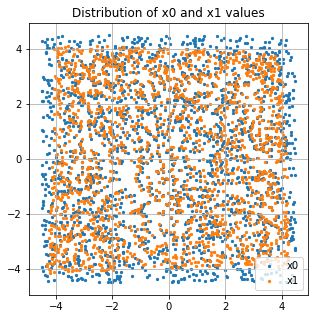

In [120]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.scatter(x0_np[:,0], x0_np[:, 1], s = 5, label='x0')
ax.scatter(x1_np[:,0], x1_np[:, 1], s = 5, label="x1")
ax.set_title("Distribution of x0 and x1 values")
ax.legend()
ax.grid()

fig.savefig('images/task3_part1_distributionX0X1', dpi=150)

In [121]:
delta_t = 1
v = (x1_np - x0_np) / delta_t
A = np.linalg.lstsq(x0_np, v, rcond=None)[0]
A

array([[-0.01001601,  0.00086727],
       [-0.00025349, -0.04326714]])

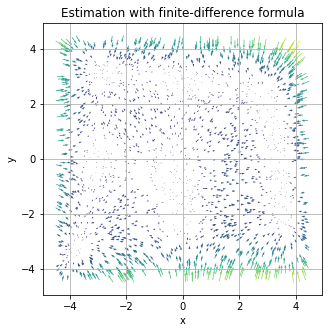

In [122]:
fig2 = plt.figure(figsize=(5,5))
ax2 = fig2.add_subplot()
ax2.quiver(x0_np[:,0], x0_np[:, 1], v[:,0], v[:, 1], np.linalg.norm(v,axis=1),cmap='viridis')
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Estimation with finite-difference formula")
ax2.grid()

fig2.savefig('images/task3_part1_finiteDiffFormula', dpi=150)

In [123]:
sol = np.zeros((x0_np.shape[0], 2))
for i in range(0,len(x0_np)):
    sol[i, :] = solve_ivp(lambda t, x: A @ x, t_span=[0, 0.1], t_eval=[0.1], y0=x0_np[i, :]).y.reshape(-1)

In [124]:
results_array = A@x0_np.transpose()

mse = np.linalg.norm(results_array - x1)**2
print('Mean squared error:', mse )

Mean squared error: 26967.125886761885


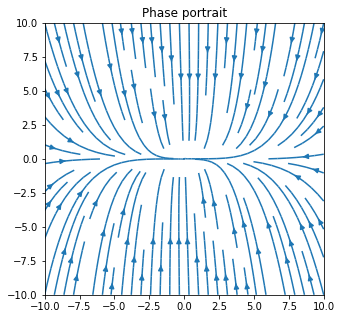

In [125]:
# define notebook parameters
x, y = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))

u = A[0][0] * x + A[0][1] * y
v = A[1][0] * x + A[1][1] * y

fig5 = plt.figure(figsize=(5, 5))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])
ax5 = fig5.add_subplot()
ax5 = plt.streamplot(x, y, u, v)

ax5 = plt.title('Phase portrait')

fig5.savefig('images/task3_part1_phaseportrait', dpi=150)

## Part 2

Transposing for better personal handling:

In [111]:
x0 = x0_np.transpose()
x1 = x1_np.transpose()

In [112]:
x0.shape

(2, 2000)

Calculation of $\epsilon$ in accordance to diffusion maps.

In [113]:
# Calculating epsilon

# concatenate data points:

x_conc = np.zeros([2, 4000])
x_conc[:, 0:2000] = x0
x_conc[:, 2000:4000] = x1

D = np.zeros([4000, 4000])

for i in range(4000):
    for j in range(4000):
        D[i, j] = np.linalg.norm(np.array([x_conc[0, i], x_conc[1, i]])-np.array([x_conc[0, j], x_conc[1, j]]))


epsilon = 0.05 * D.max()

In [114]:
epsilon

0.6207036470222818

The number of summands L. We were not able to find a way to calculate L. For that matter, we found a minimum at $L=809$ by simulation.

In [115]:
L = 809

Calculation of the matrix PHI:

In [116]:
PHI = np.zeros([2000, L])

for i in range(2000):
    for j in range(L):
        PHI[i, j] = rbf(x0[:, i], x0[:, j], epsilon)

Calculation of the matrix C:

In [117]:
C = (np.linalg.inv((PHI.transpose()@PHI))@PHI.transpose()@x1.transpose()).transpose()

Calculation of the results:

In [126]:
results_array_nonlin = np.zeros([2, 2000])

for i in range(2000):
    results_array_nonlin[:, i] = nonlin_decomp(x1[:, i], x0, L, C, epsilon)

Calculation of the mean squared error: 

In [127]:
mse = np.linalg.norm(results_array_nonlin - x1)**2
mse

59.77291501710122

Plotting the data:

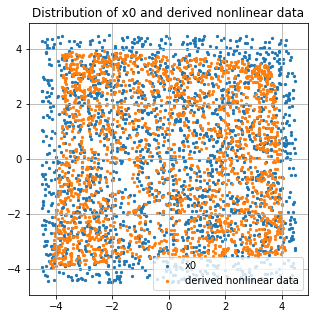

In [128]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.scatter(x0_np[:,0], x0_np[:, 1], s = 5, label='x0')
ax.scatter(results_array_nonlin[0,:], results_array_nonlin[1,:], s = 5, label="derived nonlinear data")
ax.set_title("Distribution of x0 and derived nonlinear data")
ax.legend()
ax.grid()

fig.savefig('images/task3_2_distributionX0X1', dpi=150)